## IPL Win Probability Predictor

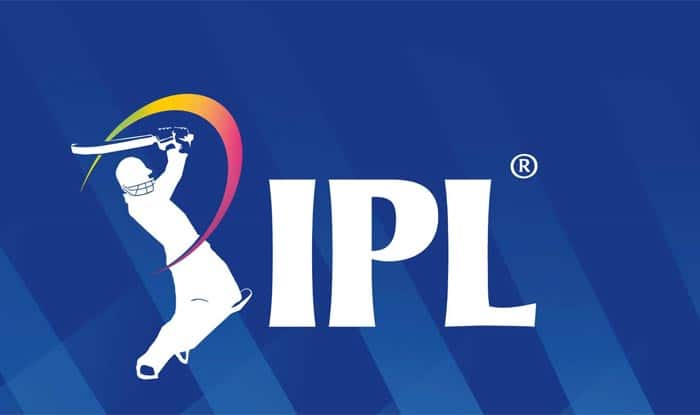

## Table of Contents

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
ipl_matches = pd.read_csv('/Users/nehaagrawal/Desktop/IPL_Matches_2008_2021.csv')
ipl_dlv = pd.read_csv('/Users/nehaagrawal/Desktop/IPL_Ball_by_Ball_2008_2021.csv')

In [3]:
ipl_matches.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1254117,Dubai,2021-10-15,2021,Final,Chennai Super Kings,Kolkata Knight Riders,Dubai International Cricket Stadium,Kolkata Knight Riders,field,N,Chennai Super Kings,Runs,27.0,NaN,F du Plessis,"['RD Gaikwad', 'F du Plessis', 'RV Uthappa', '...","['Shubman Gill', 'VR Iyer', 'N Rana', 'SP Nari...",Nitin Menon,RK Illingworth
1,1254116,Sharjah,2021-10-13,2021,Qualifier 2,Delhi Capitals,Kolkata Knight Riders,Sharjah Cricket Stadium,Kolkata Knight Riders,field,N,Kolkata Knight Riders,Wickets,3.0,NaN,VR Iyer,"['PP Shaw', 'S Dhawan', 'MP Stoinis', 'SS Iyer...","['Shubman Gill', 'VR Iyer', 'N Rana', 'RA Trip...",KN Ananthapadmanabhan,MA Gough
2,1254115,Sharjah,2021-10-11,2021,Eliminator,Royal Challengers Bangalore,Kolkata Knight Riders,Sharjah Cricket Stadium,Royal Challengers Bangalore,bat,N,Kolkata Knight Riders,Wickets,4.0,NaN,SP Narine,"['D Padikkal', 'V Kohli', 'KS Bharat', 'GJ Max...","['Shubman Gill', 'VR Iyer', 'RA Tripathi', 'N ...",CB Gaffaney,VK Sharma
3,1254114,Dubai,2021-10-10,2021,Qualifier 1,Delhi Capitals,Chennai Super Kings,Dubai International Cricket Stadium,Chennai Super Kings,field,N,Chennai Super Kings,Wickets,4.0,NaN,RD Gaikwad,"['PP Shaw', 'S Dhawan', 'SS Iyer', 'AR Patel',...","['RD Gaikwad', 'F du Plessis', 'RV Uthappa', '...",Nitin Menon,RK Illingworth
4,1254088,Abu Dhabi,2021-10-08,2021,55,Mumbai Indians,Sunrisers Hyderabad,"Zayed Cricket Stadium, Abu Dhabi",Mumbai Indians,bat,N,Mumbai Indians,Runs,42.0,NaN,Ishan Kishan,"['RG Sharma', 'Ishan Kishan', 'HH Pandya', 'KA...","['JJ Roy', 'Abhishek Sharma', 'MK Pandey', 'Mo...",Tapan Sharma,VK Sharma


In [4]:
ipl_dlv.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1254117,1,0,1,RD Gaikwad,Shakib Al Hasan,F du Plessis,NaN,1,0,1,0,0,NaN,NaN,NaN,Chennai Super Kings
1,1254117,1,0,2,F du Plessis,Shakib Al Hasan,RD Gaikwad,NaN,0,0,0,0,0,NaN,NaN,NaN,Chennai Super Kings
2,1254117,1,0,3,F du Plessis,Shakib Al Hasan,RD Gaikwad,NaN,1,0,1,0,0,NaN,NaN,NaN,Chennai Super Kings
3,1254117,1,0,4,RD Gaikwad,Shakib Al Hasan,F du Plessis,NaN,4,0,4,0,0,NaN,NaN,NaN,Chennai Super Kings
4,1254117,1,0,5,RD Gaikwad,Shakib Al Hasan,F du Plessis,NaN,0,0,0,0,0,NaN,NaN,NaN,Chennai Super Kings


In [5]:
ipl_matches.shape

(876, 20)

In [6]:
ipl_dlv.shape

(208042, 17)

In [7]:
ipl_dlv.columns

Index(['ID', 'innings', 'overs', 'ballnumber', 'batter', 'bowler',
       'non-striker', 'extra_type', 'batsman_run', 'extras_run', 'total_run',
       'non_boundary', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam'],
      dtype='object')

In [8]:
totalrun_data = ipl_dlv.groupby(['ID','innings']).sum()['total_run'].reset_index()

In [9]:
totalrun_data

,ID,innings,total_run
0,335982,1,222
1,335982,2,82
2,335983,1,240
3,335983,2,207
4,335984,1,129
...,...,...,...
1775,1254115,2,139
1776,1254116,1,135
1777,1254116,2,136
1778,1254117,1,192


In [10]:
totalrun_data = totalrun_data[totalrun_data['innings']==1]
totalrun_data['total_run'] = totalrun_data['total_run'].apply(lambda x:x+1)
totalrun_data

<ipython-input-10-81b9ba64000d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  totalrun_data['total_run'] = totalrun_data['total_run'].apply(lambda x:x+1)


,ID,innings,total_run
0,335982,1,223
2,335983,1,241
4,335984,1,130
6,335985,1,166
8,335986,1,111
...,...,...,...
1770,1254113,1,157
1772,1254114,1,173
1774,1254115,1,139
1776,1254116,1,136


In [11]:
ipl_matches.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2'],
      dtype='object')

In [12]:
matches_data = ipl_matches.merge(totalrun_data[['ID','total_run']],
                       left_on='ID',right_on='ID')

matches_data

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,total_run
0,1254117,Dubai,2021-10-15,2021,Final,Chennai Super Kings,Kolkata Knight Riders,Dubai International Cricket Stadium,Kolkata Knight Riders,field,...,Chennai Super Kings,Runs,27.0,NaN,F du Plessis,"['RD Gaikwad', 'F du Plessis', 'RV Uthappa', '...","['Shubman Gill', 'VR Iyer', 'N Rana', 'SP Nari...",Nitin Menon,RK Illingworth,193
1,1254116,Sharjah,2021-10-13,2021,Qualifier 2,Delhi Capitals,Kolkata Knight Riders,Sharjah Cricket Stadium,Kolkata Knight Riders,field,...,Kolkata Knight Riders,Wickets,3.0,NaN,VR Iyer,"['PP Shaw', 'S Dhawan', 'MP Stoinis', 'SS Iyer...","['Shubman Gill', 'VR Iyer', 'N Rana', 'RA Trip...",KN Ananthapadmanabhan,MA Gough,136
2,1254115,Sharjah,2021-10-11,2021,Eliminator,Royal Challengers Bangalore,Kolkata Knight Riders,Sharjah Cricket Stadium,Royal Challengers Bangalore,bat,...,Kolkata Knight Riders,Wickets,4.0,NaN,SP Narine,"['D Padikkal', 'V Kohli', 'KS Bharat', 'GJ Max...","['Shubman Gill', 'VR Iyer', 'RA Tripathi', 'N ...",CB Gaffaney,VK Sharma,139
3,1254114,Dubai,2021-10-10,2021,Qualifier 1,Delhi Capitals,Chennai Super Kings,Dubai International Cricket Stadium,Chennai Super Kings,field,...,Chennai Super Kings,Wickets,4.0,NaN,RD Gaikwad,"['PP Shaw', 'S Dhawan', 'SS Iyer', 'AR Patel',...","['RD Gaikwad', 'F du Plessis', 'RV Uthappa', '...",Nitin Menon,RK Illingworth,173
4,1254088,Abu Dhabi,2021-10-08,2021,55,Mumbai Indians,Sunrisers Hyderabad,"Zayed Cricket Stadium, Abu Dhabi",Mumbai Indians,bat,...,Mumbai Indians,Runs,42.0,NaN,Ishan Kishan,"['RG Sharma', 'Ishan Kishan', 'HH Pandya', 'KA...","['JJ Roy', 'Abhishek Sharma', 'MK Pandey', 'Mo...",Tapan Sharma,VK Sharma,236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,335985,Mumbai,2008-04-20,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,...,Royal Challengers Bangalore,Wickets,5.0,NaN,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper,166
872,335986,Kolkata,2008-04-20,2007/08,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,...,Kolkata Knight Riders,Wickets,5.0,NaN,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan,111
873,335984,Delhi,2008-04-19,2007/08,3,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,...,Delhi Daredevils,Wickets,9.0,NaN,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar,130
874,335983,Chandigarh,2008-04-19,2007/08,2,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,...,Chennai Super Kings,Runs,33.0,NaN,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri,241


In [13]:
matches_data['Team1'].unique()

array(['Chennai Super Kings', 'Delhi Capitals',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Sunrisers Hyderabad', 'Rajasthan Royals',
       'Punjab Kings', 'Kings XI Punjab', 'Delhi Daredevils',
       'Rising Pune Supergiant', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Pune Warriors', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

In [14]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]

In [15]:
matches_data['Team1'] = matches_data['Team1'].str.replace('Delhi Daredevils','Delhi Capitals')
matches_data['Team2'] = matches_data['Team2'].str.replace('Delhi Daredevils','Delhi Capitals')


# replacing the Deccan Chargers with Sunrises Hyderabad

matches_data['Team1'] = matches_data['Team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
matches_data['Team2'] = matches_data['Team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [16]:
matches_data = matches_data[matches_data['Team1'].isin(teams)]
matches_data = matches_data[matches_data['Team2'].isin(teams)]

matches_data['Team1'].unique()

array(['Chennai Super Kings', 'Delhi Capitals',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Sunrisers Hyderabad', 'Rajasthan Royals',
       'Kings XI Punjab'], dtype=object)

In [17]:
matches_data.shape

(747, 21)

In [18]:
matches_data.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,total_run
0,1254117,Dubai,2021-10-15,2021,Final,Chennai Super Kings,Kolkata Knight Riders,Dubai International Cricket Stadium,Kolkata Knight Riders,field,...,Chennai Super Kings,Runs,27.0,NaN,F du Plessis,"['RD Gaikwad', 'F du Plessis', 'RV Uthappa', '...","['Shubman Gill', 'VR Iyer', 'N Rana', 'SP Nari...",Nitin Menon,RK Illingworth,193
1,1254116,Sharjah,2021-10-13,2021,Qualifier 2,Delhi Capitals,Kolkata Knight Riders,Sharjah Cricket Stadium,Kolkata Knight Riders,field,...,Kolkata Knight Riders,Wickets,3.0,NaN,VR Iyer,"['PP Shaw', 'S Dhawan', 'MP Stoinis', 'SS Iyer...","['Shubman Gill', 'VR Iyer', 'N Rana', 'RA Trip...",KN Ananthapadmanabhan,MA Gough,136
2,1254115,Sharjah,2021-10-11,2021,Eliminator,Royal Challengers Bangalore,Kolkata Knight Riders,Sharjah Cricket Stadium,Royal Challengers Bangalore,bat,...,Kolkata Knight Riders,Wickets,4.0,NaN,SP Narine,"['D Padikkal', 'V Kohli', 'KS Bharat', 'GJ Max...","['Shubman Gill', 'VR Iyer', 'RA Tripathi', 'N ...",CB Gaffaney,VK Sharma,139
3,1254114,Dubai,2021-10-10,2021,Qualifier 1,Delhi Capitals,Chennai Super Kings,Dubai International Cricket Stadium,Chennai Super Kings,field,...,Chennai Super Kings,Wickets,4.0,NaN,RD Gaikwad,"['PP Shaw', 'S Dhawan', 'SS Iyer', 'AR Patel',...","['RD Gaikwad', 'F du Plessis', 'RV Uthappa', '...",Nitin Menon,RK Illingworth,173
4,1254088,Abu Dhabi,2021-10-08,2021,55,Mumbai Indians,Sunrisers Hyderabad,"Zayed Cricket Stadium, Abu Dhabi",Mumbai Indians,bat,...,Mumbai Indians,Runs,42.0,NaN,Ishan Kishan,"['RG Sharma', 'Ishan Kishan', 'HH Pandya', 'KA...","['JJ Roy', 'Abhishek Sharma', 'MK Pandey', 'Mo...",Tapan Sharma,VK Sharma,236


In [19]:
# considering the match_id,city,winner and total runs

matches_data = matches_data[['ID','City','WinningTeam','total_run']]

matches_data

,ID,City,WinningTeam,total_run
0,1254117,Dubai,Chennai Super Kings,193
1,1254116,Sharjah,Kolkata Knight Riders,136
2,1254115,Sharjah,Kolkata Knight Riders,139
3,1254114,Dubai,Chennai Super Kings,173
4,1254088,Abu Dhabi,Mumbai Indians,236
...,...,...,...,...
871,335985,Mumbai,Royal Challengers Bangalore,166
872,335986,Kolkata,Kolkata Knight Riders,111
873,335984,Delhi,Delhi Daredevils,130
874,335983,Chandigarh,Chennai Super Kings,241


In [20]:
# merging matchdf with delevieries on match_id

dlv_data = matches_data.merge(ipl_dlv,on='ID')
dlv_data.head()

,ID,City,WinningTeam,total_run_x,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run_y,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1254117,Dubai,Chennai Super Kings,193,1,0,1,RD Gaikwad,Shakib Al Hasan,F du Plessis,NaN,1,0,1,0,0,NaN,NaN,NaN,Chennai Super Kings
1,1254117,Dubai,Chennai Super Kings,193,1,0,2,F du Plessis,Shakib Al Hasan,RD Gaikwad,NaN,0,0,0,0,0,NaN,NaN,NaN,Chennai Super Kings
2,1254117,Dubai,Chennai Super Kings,193,1,0,3,F du Plessis,Shakib Al Hasan,RD Gaikwad,NaN,1,0,1,0,0,NaN,NaN,NaN,Chennai Super Kings
3,1254117,Dubai,Chennai Super Kings,193,1,0,4,RD Gaikwad,Shakib Al Hasan,F du Plessis,NaN,4,0,4,0,0,NaN,NaN,NaN,Chennai Super Kings
4,1254117,Dubai,Chennai Super Kings,193,1,0,5,RD Gaikwad,Shakib Al Hasan,F du Plessis,NaN,0,0,0,0,0,NaN,NaN,NaN,Chennai Super Kings


In [21]:
dlv_data.columns

Index(['ID', 'City', 'WinningTeam', 'total_run_x', 'innings', 'overs',
       'ballnumber', 'batter', 'bowler', 'non-striker', 'extra_type',
       'batsman_run', 'extras_run', 'total_run_y', 'non_boundary',
       'isWicketDelivery', 'player_out', 'kind', 'fielders_involved',
       'BattingTeam'],
      dtype='object')

In [22]:
# considering the 2nd innings 

dlv_data = dlv_data[dlv_data['innings'] == 2]
dlv_data.head()

,ID,City,WinningTeam,total_run_x,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run_y,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
124,1254117,Dubai,Chennai Super Kings,193,2,0,1,Shubman Gill,DL Chahar,VR Iyer,wides,0,1,1,0,0,NaN,NaN,NaN,Kolkata Knight Riders
125,1254117,Dubai,Chennai Super Kings,193,2,0,2,Shubman Gill,DL Chahar,VR Iyer,NaN,4,0,4,0,0,NaN,NaN,NaN,Kolkata Knight Riders
126,1254117,Dubai,Chennai Super Kings,193,2,0,3,Shubman Gill,DL Chahar,VR Iyer,NaN,0,0,0,0,0,NaN,NaN,NaN,Kolkata Knight Riders
127,1254117,Dubai,Chennai Super Kings,193,2,0,4,Shubman Gill,DL Chahar,VR Iyer,NaN,0,0,0,0,0,NaN,NaN,NaN,Kolkata Knight Riders
128,1254117,Dubai,Chennai Super Kings,193,2,0,5,Shubman Gill,DL Chahar,VR Iyer,NaN,0,0,0,0,0,NaN,NaN,NaN,Kolkata Knight Riders


In [23]:
# current score of particular match

dlv_data['current_score'] = dlv_data.groupby('ID').cumsum()['total_run_y']

dlv_data.head()

,ID,City,WinningTeam,total_run_x,innings,overs,ballnumber,batter,bowler,non-striker,...,batsman_run,extras_run,total_run_y,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score
124,1254117,Dubai,Chennai Super Kings,193,2,0,1,Shubman Gill,DL Chahar,VR Iyer,...,0,1,1,0,0,NaN,NaN,NaN,Kolkata Knight Riders,1
125,1254117,Dubai,Chennai Super Kings,193,2,0,2,Shubman Gill,DL Chahar,VR Iyer,...,4,0,4,0,0,NaN,NaN,NaN,Kolkata Knight Riders,5
126,1254117,Dubai,Chennai Super Kings,193,2,0,3,Shubman Gill,DL Chahar,VR Iyer,...,0,0,0,0,0,NaN,NaN,NaN,Kolkata Knight Riders,5
127,1254117,Dubai,Chennai Super Kings,193,2,0,4,Shubman Gill,DL Chahar,VR Iyer,...,0,0,0,0,0,NaN,NaN,NaN,Kolkata Knight Riders,5
128,1254117,Dubai,Chennai Super Kings,193,2,0,5,Shubman Gill,DL Chahar,VR Iyer,...,0,0,0,0,0,NaN,NaN,NaN,Kolkata Knight Riders,5


In [24]:
# runs left 

dlv_data['runs_left'] = dlv_data['total_run_x']-dlv_data['current_score']

dlv_data.head()

,ID,City,WinningTeam,total_run_x,innings,overs,ballnumber,batter,bowler,non-striker,...,extras_run,total_run_y,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score,runs_left
124,1254117,Dubai,Chennai Super Kings,193,2,0,1,Shubman Gill,DL Chahar,VR Iyer,...,1,1,0,0,NaN,NaN,NaN,Kolkata Knight Riders,1,192
125,1254117,Dubai,Chennai Super Kings,193,2,0,2,Shubman Gill,DL Chahar,VR Iyer,...,0,4,0,0,NaN,NaN,NaN,Kolkata Knight Riders,5,188
126,1254117,Dubai,Chennai Super Kings,193,2,0,3,Shubman Gill,DL Chahar,VR Iyer,...,0,0,0,0,NaN,NaN,NaN,Kolkata Knight Riders,5,188
127,1254117,Dubai,Chennai Super Kings,193,2,0,4,Shubman Gill,DL Chahar,VR Iyer,...,0,0,0,0,NaN,NaN,NaN,Kolkata Knight Riders,5,188
128,1254117,Dubai,Chennai Super Kings,193,2,0,5,Shubman Gill,DL Chahar,VR Iyer,...,0,0,0,0,NaN,NaN,NaN,Kolkata Knight Riders,5,188


In [25]:
# balls left

dlv_data['balls_left'] = 126-(dlv_data['overs']*6+dlv_data['ballnumber'])

dlv_data

,ID,City,WinningTeam,total_run_x,innings,overs,ballnumber,batter,bowler,non-striker,...,total_run_y,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score,runs_left,balls_left
124,1254117,Dubai,Chennai Super Kings,193,2,0,1,Shubman Gill,DL Chahar,VR Iyer,...,1,0,0,NaN,NaN,NaN,Kolkata Knight Riders,1,192,125
125,1254117,Dubai,Chennai Super Kings,193,2,0,2,Shubman Gill,DL Chahar,VR Iyer,...,4,0,0,NaN,NaN,NaN,Kolkata Knight Riders,5,188,124
126,1254117,Dubai,Chennai Super Kings,193,2,0,3,Shubman Gill,DL Chahar,VR Iyer,...,0,0,0,NaN,NaN,NaN,Kolkata Knight Riders,5,188,123
127,1254117,Dubai,Chennai Super Kings,193,2,0,4,Shubman Gill,DL Chahar,VR Iyer,...,0,0,0,NaN,NaN,NaN,Kolkata Knight Riders,5,188,122
128,1254117,Dubai,Chennai Super Kings,193,2,0,5,Shubman Gill,DL Chahar,VR Iyer,...,0,0,0,NaN,NaN,NaN,Kolkata Knight Riders,5,188,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177694,335982,Bangalore,Kolkata Knight Riders,223,2,14,5,P Kumar,I Sharma,SB Joshi,...,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,80,143,37
177695,335982,Bangalore,Kolkata Knight Riders,223,2,14,6,SB Joshi,I Sharma,P Kumar,...,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,81,142,36
177696,335982,Bangalore,Kolkata Knight Riders,223,2,14,7,P Kumar,I Sharma,SB Joshi,...,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,81,142,35
177697,335982,Bangalore,Kolkata Knight Riders,223,2,15,1,SB Joshi,LR Shukla,P Kumar,...,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,82,141,35


In [26]:
list(dlv_data['player_out'].unique())[:2]

[nan, 'VR Iyer']

In [27]:
# filling nan values with "0"

dlv_data['player_out'] = dlv_data['player_out'].fillna("0")

# now we will convert this player_dismissed col into a boolean col
# if the player is not dismissed then it's 0 else its 1

dlv_data['player_out'] = dlv_data['player_out'].apply(lambda x:x if x=="0" else "1")

# converting string to int

dlv_data['player_out'] = dlv_data['player_out'].astype('int')


dlv_data['player_out'].unique()



array([0, 1])

In [28]:
# wickets fallen 

wickets = dlv_data.groupby('ID').cumsum()['player_out'].values

dlv_data['wickets'] = 10-wickets

dlv_data

,ID,City,WinningTeam,total_run_x,innings,overs,ballnumber,batter,bowler,non-striker,...,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score,runs_left,balls_left,wickets
124,1254117,Dubai,Chennai Super Kings,193,2,0,1,Shubman Gill,DL Chahar,VR Iyer,...,0,0,0,NaN,NaN,Kolkata Knight Riders,1,192,125,10
125,1254117,Dubai,Chennai Super Kings,193,2,0,2,Shubman Gill,DL Chahar,VR Iyer,...,0,0,0,NaN,NaN,Kolkata Knight Riders,5,188,124,10
126,1254117,Dubai,Chennai Super Kings,193,2,0,3,Shubman Gill,DL Chahar,VR Iyer,...,0,0,0,NaN,NaN,Kolkata Knight Riders,5,188,123,10
127,1254117,Dubai,Chennai Super Kings,193,2,0,4,Shubman Gill,DL Chahar,VR Iyer,...,0,0,0,NaN,NaN,Kolkata Knight Riders,5,188,122,10
128,1254117,Dubai,Chennai Super Kings,193,2,0,5,Shubman Gill,DL Chahar,VR Iyer,...,0,0,0,NaN,NaN,Kolkata Knight Riders,5,188,121,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177694,335982,Bangalore,Kolkata Knight Riders,223,2,14,5,P Kumar,I Sharma,SB Joshi,...,0,0,0,NaN,NaN,Royal Challengers Bangalore,80,143,37,1
177695,335982,Bangalore,Kolkata Knight Riders,223,2,14,6,SB Joshi,I Sharma,P Kumar,...,0,0,0,NaN,NaN,Royal Challengers Bangalore,81,142,36,1
177696,335982,Bangalore,Kolkata Knight Riders,223,2,14,7,P Kumar,I Sharma,SB Joshi,...,0,0,0,NaN,NaN,Royal Challengers Bangalore,81,142,35,1
177697,335982,Bangalore,Kolkata Knight Riders,223,2,15,1,SB Joshi,LR Shukla,P Kumar,...,0,0,0,NaN,NaN,Royal Challengers Bangalore,82,141,35,1


In [29]:
# current run rate

dlv_data['cur_run_rate'] = (dlv_data['current_score']*6)/(126-dlv_data['balls_left'])

# required run rate

dlv_data['req_run_rate'] = (dlv_data['runs_left']*6)/(dlv_data['balls_left'])


dlv_data.head(3)

,ID,City,WinningTeam,total_run_x,innings,overs,ballnumber,batter,bowler,non-striker,...,player_out,kind,fielders_involved,BattingTeam,current_score,runs_left,balls_left,wickets,cur_run_rate,req_run_rate
124,1254117,Dubai,Chennai Super Kings,193,2,0,1,Shubman Gill,DL Chahar,VR Iyer,...,0,NaN,NaN,Kolkata Knight Riders,1,192,125,10,6.0,9.216000
125,1254117,Dubai,Chennai Super Kings,193,2,0,2,Shubman Gill,DL Chahar,VR Iyer,...,0,NaN,NaN,Kolkata Knight Riders,5,188,124,10,15.0,9.096774
126,1254117,Dubai,Chennai Super Kings,193,2,0,3,Shubman Gill,DL Chahar,VR Iyer,...,0,NaN,NaN,Kolkata Knight Riders,5,188,123,10,10.0,9.170732


In [30]:
def resultfun(row):
    
    return 1 if row['BattingTeam'] == row['WinningTeam'] else 0

In [31]:
dlv_data['result'] = dlv_data.apply(resultfun,axis=1)
dlv_data.head(10)

,ID,City,WinningTeam,total_run_x,innings,overs,ballnumber,batter,bowler,non-striker,...,kind,fielders_involved,BattingTeam,current_score,runs_left,balls_left,wickets,cur_run_rate,req_run_rate,result
124,1254117,Dubai,Chennai Super Kings,193,2,0,1,Shubman Gill,DL Chahar,VR Iyer,...,NaN,NaN,Kolkata Knight Riders,1,192,125,10,6.000000,9.216000,0
125,1254117,Dubai,Chennai Super Kings,193,2,0,2,Shubman Gill,DL Chahar,VR Iyer,...,NaN,NaN,Kolkata Knight Riders,5,188,124,10,15.000000,9.096774,0
126,1254117,Dubai,Chennai Super Kings,193,2,0,3,Shubman Gill,DL Chahar,VR Iyer,...,NaN,NaN,Kolkata Knight Riders,5,188,123,10,10.000000,9.170732,0
127,1254117,Dubai,Chennai Super Kings,193,2,0,4,Shubman Gill,DL Chahar,VR Iyer,...,NaN,NaN,Kolkata Knight Riders,5,188,122,10,7.500000,9.245902,0
128,1254117,Dubai,Chennai Super Kings,193,2,0,5,Shubman Gill,DL Chahar,VR Iyer,...,NaN,NaN,Kolkata Knight Riders,5,188,121,10,6.000000,9.322314,0
129,1254117,Dubai,Chennai Super Kings,193,2,0,6,Shubman Gill,DL Chahar,VR Iyer,...,NaN,NaN,Kolkata Knight Riders,5,188,120,10,5.000000,9.400000,0
130,1254117,Dubai,Chennai Super Kings,193,2,0,7,Shubman Gill,DL Chahar,VR Iyer,...,NaN,NaN,Kolkata Knight Riders,6,187,119,10,5.142857,9.428571,0
131,1254117,Dubai,Chennai Super Kings,193,2,1,1,Shubman Gill,JR Hazlewood,VR Iyer,...,NaN,NaN,Kolkata Knight Riders,7,186,119,10,6.000000,9.378151,0
132,1254117,Dubai,Chennai Super Kings,193,2,1,2,VR Iyer,JR Hazlewood,Shubman Gill,...,NaN,NaN,Kolkata Knight Riders,7,186,118,10,5.250000,9.457627,0
133,1254117,Dubai,Chennai Super Kings,193,2,1,3,VR Iyer,JR Hazlewood,Shubman Gill,...,NaN,NaN,Kolkata Knight Riders,7,186,117,10,4.666667,9.538462,0


/Users/nehaagrawal/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='result', ylabel='count'>

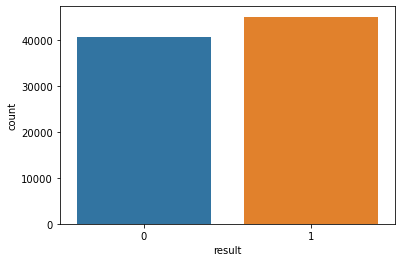

In [32]:
sns.countplot(dlv_data['result'])

In [33]:
final_df = dlv_data[['BattingTeam','WinningTeam','City','runs_left',
                        'balls_left','wickets','total_run_x','cur_run_rate',
                        'req_run_rate','result']]

final_df.head()

,BattingTeam,WinningTeam,City,runs_left,balls_left,wickets,total_run_x,cur_run_rate,req_run_rate,result
124,Kolkata Knight Riders,Chennai Super Kings,Dubai,192,125,10,193,6.0,9.216000,0
125,Kolkata Knight Riders,Chennai Super Kings,Dubai,188,124,10,193,15.0,9.096774,0
126,Kolkata Knight Riders,Chennai Super Kings,Dubai,188,123,10,193,10.0,9.170732,0
127,Kolkata Knight Riders,Chennai Super Kings,Dubai,188,122,10,193,7.5,9.245902,0
128,Kolkata Knight Riders,Chennai Super Kings,Dubai,188,121,10,193,6.0,9.322314,0


In [34]:
final_df.shape

(85688, 10)

In [35]:
final_df.isnull().sum()

BattingTeam        0
WinningTeam       27
City            6012
runs_left          0
balls_left         0
wickets            0
total_run_x        0
cur_run_rate       0
req_run_rate       0
result             0
dtype: int64

In [36]:
final_df = final_df.dropna()

final_df.isnull().sum()

BattingTeam     0
WinningTeam     0
City            0
runs_left       0
balls_left      0
wickets         0
total_run_x     0
cur_run_rate    0
req_run_rate    0
result          0
dtype: int64

In [37]:
final_df = final_df[final_df['balls_left'] != 0]

In [38]:
data = final_df.copy()

test = data['result']

train = data.drop(['result'],axis = 1)

train.head()

,BattingTeam,WinningTeam,City,runs_left,balls_left,wickets,total_run_x,cur_run_rate,req_run_rate
124,Kolkata Knight Riders,Chennai Super Kings,Dubai,192,125,10,193,6.0,9.216000
125,Kolkata Knight Riders,Chennai Super Kings,Dubai,188,124,10,193,15.0,9.096774
126,Kolkata Knight Riders,Chennai Super Kings,Dubai,188,123,10,193,10.0,9.170732
127,Kolkata Knight Riders,Chennai Super Kings,Dubai,188,122,10,193,7.5,9.245902
128,Kolkata Knight Riders,Chennai Super Kings,Dubai,188,121,10,193,6.0,9.322314


In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train,test,test_size=0.2,random_state=1)

X_train.shape,X_test.shape

((63719, 9), (15930, 9))

In [40]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [41]:
# batting team,bowling team and city are categorical columns
# they will be converted to numeric using onehot encoder

cf = ColumnTransformer([
   ('cf',OneHotEncoder(sparse=False,drop='first'),['BattingTeam','WinningTeam','City'])
]
,remainder='passthrough')

In [46]:
#creating the pipeline


pipe = Pipeline(steps=[
    ('step1',cf),
    ('step2',LogisticRegression(solver='liblinear'))
])

# fitting the training data

pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['BattingTeam', 'WinningTeam',
                                                   'City'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [47]:
y_pred = pipe.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.8149403640929065


In [48]:
pipe.predict_proba(X_test)[14]

array([0.17657845, 0.82342155])

In [49]:
# saving the logistic regression model

#import pickle
#pickle.dump(pipe,open('pipe.pkl','wb'))

In [50]:
teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

In [51]:
dlv_data['City'].unique()

array(['Dubai', 'Sharjah', 'Abu Dhabi', 'Delhi', 'Ahmedabad', 'Chennai',
       'Mumbai', nan, 'Hyderabad', 'Visakhapatnam', 'Chandigarh',
       'Bengaluru', 'Kolkata', 'Jaipur', 'Pune', 'Indore', 'Bangalore',
       'Raipur', 'Ranchi', 'Cuttack', 'Dharamsala', 'Nagpur',
       'Johannesburg', 'Centurion', 'Durban', 'Bloemfontein',
       'Port Elizabeth', 'Kimberley', 'East London', 'Cape Town'],
      dtype=object)

In [52]:
#pip install Scikit-learn

In [53]:
from joblib import Parallel, delayed
import joblib
 
#save the model as a pickle in a file

joblib.dump(pipe, 'pipe.pkl')
 
# Load the model from the file
#knn_from_joblib = joblib.load('knn.pkl')
 
# Use the loaded model to make predictions
#knn_from_joblib.predict(X_test)

['pipe.pkl']

In [55]:
python_version()

'3.8.8'

In [56]:
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

sklearn: 1.1.1


In [57]:
pip install upgrade scikit-learn

ERROR: Could not find a version that satisfies the requirement upgrade (from versions: none)
ERROR: No matching distribution found for upgrade
Note: you may need to restart the kernel to use updated packages.


In [58]:
#conda install -c conda-forge scikit-learn

Solving environment: - 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/osx-64::_anaconda_depends==2020.07=py38_0
  - defaults/osx-64::anaconda==custom=py38_1
done

## Package Plan ##

  environment location: /Users/nehaagrawal/opt/anaconda3

  added / updated specs:
    - scikit-learn


The following NEW packages will be INSTALLED:

  scikit-learn       conda-forge/osx-64::scikit-learn-0.22.1-py38h3dc85bc_1


Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.
